In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('pmsm_data.csv')

In [3]:
df.shape

(1330816, 13)

In [4]:
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [5]:
df['ambient']

0          19.850691
1          19.850672
2          19.850657
3          19.850647
4          19.850639
             ...    
1330811    23.989078
1330812    23.970700
1330813    23.977234
1330814    24.001421
1330815    24.027522
Name: ambient, Length: 1330816, dtype: float64

In [6]:
df['ambient'].mean()

24.565255952081735

In [7]:
df['ambient'].median()

24.79732676998298

<AxesSubplot:>

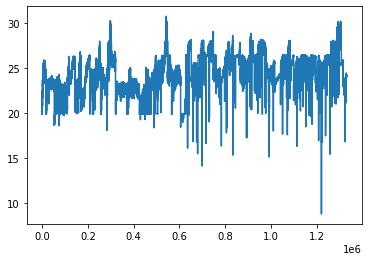

In [8]:
df['ambient'].plot()

In [9]:
df['ambient'].std()

1.9295218592241008

In [10]:
df['ambient'].quantile(0.9)

26.413624881235293

In [11]:
df['ambient'].quantile([0.05,0.25,0.5,0.75,0.99])

0.05    21.398393
0.25    23.184804
0.50    24.797327
0.75    26.217019
0.99    28.571138
Name: ambient, dtype: float64

In [12]:
df['ambient'].max()

30.714204788208008

In [13]:
df['ambient'].min()

8.78347834400473

In [14]:
df['stator_yoke'].mean()

48.187964864903044

In [15]:
df['stator_yoke'].max()

101.14796436478986

In [16]:
df['stator_yoke'].min()

18.07668876647949

In [17]:
df['pm'].max()

113.60662841796876

In [18]:
df['pm'].min()

20.856956481933597

In [19]:
df['pm'].mean()

58.50677585061559

In [20]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


In [21]:
df.groupby('profile_id').mean()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
profile_id,,,,,,,,,,,,
2,5.894508,18.542054,51.110270,-2.815422,39.106455,100.000216,-48.212822,93.315905,32.759597,31.642673,22.170210,79.148595
3,5.918387,18.761891,29.033779,-1.958329,24.911178,99.996061,-22.684171,66.636316,26.285130,22.561374,21.981501,51.692367
4,76.794853,18.626801,46.010193,-38.563626,39.288129,2683.072902,-52.435694,40.571468,49.762076,31.145305,24.555701,32.835482
5,47.176984,18.801043,30.747415,-18.290178,27.356993,999.990768,-19.476087,56.473858,33.213100,23.788795,22.761450,43.519544
6,63.622428,29.022098,70.843022,-41.895906,58.828068,3445.307672,-101.816880,16.833996,69.232339,46.254285,25.644514,15.345794
...,...,...,...,...,...,...,...,...,...,...,...,...
76,44.941804,54.300834,73.277884,-3.105829,66.254158,1947.545367,-54.585210,1.923519,67.596298,60.121051,26.272326,1.193692
78,47.911893,51.329973,68.506249,-7.571163,61.457156,1876.569539,-55.514796,2.274921,55.021131,56.009639,25.606642,2.607439
79,50.683489,54.419152,77.292279,6.010403,69.093013,2088.108155,-59.743103,-12.986380,68.716465,62.094829,25.881772,-10.334681


Text(0, 0.5, 'Temperature (C)')

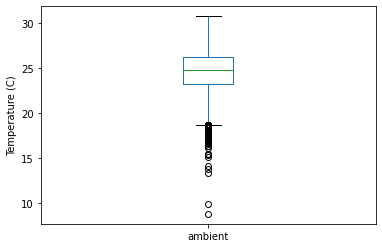

In [22]:
ax = (df['ambient']).plot.box()
ax.set_ylabel("Temperature (C)")

Text(0, 0.5, 'Temperature (C)')

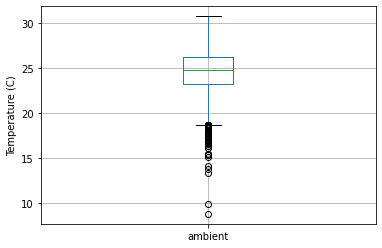

In [23]:
ax = df.boxplot(column=["ambient"])
ax.set_ylabel("Temperature (C)")

Text(0, 0.5, 'Temperature (C)')

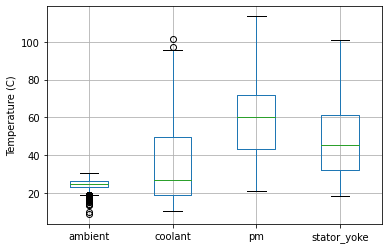

In [24]:
ax = df.boxplot(column=["ambient","coolant","pm","stator_yoke"])
ax.set_ylabel("Temperature (C)")

Text(0.5, 0, 'Temperature (C)')

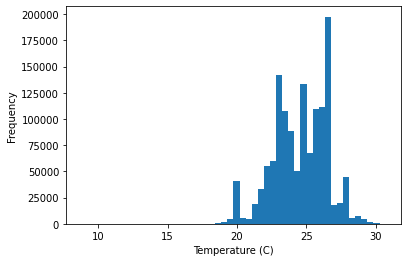

In [25]:
ax = df['ambient'].plot.hist(bins=50)
ax.set_xlabel("Temperature (C)")

Text(0.5, 0, 'Temperature (C)')

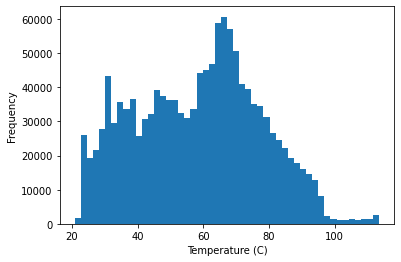

In [26]:
ax = df['pm'].plot.hist(bins=50)
ax.set_xlabel("Temperature (C)")

Text(0.5, 0, 'Temperature (C)')

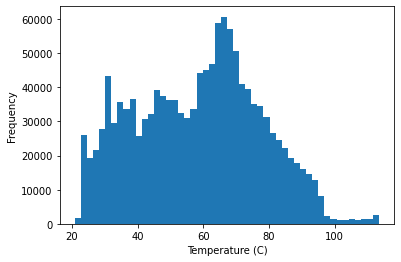

In [27]:
ax = df['pm'].plot.hist(bins=50)
ax.set_xlabel("Temperature (C)")

array([[<AxesSubplot:title={'center':'u_q'}>,
        <AxesSubplot:title={'center':'coolant'}>,
        <AxesSubplot:title={'center':'stator_winding'}>,
        <AxesSubplot:title={'center':'u_d'}>],
       [<AxesSubplot:title={'center':'stator_tooth'}>,
        <AxesSubplot:title={'center':'motor_speed'}>,
        <AxesSubplot:title={'center':'i_d'}>,
        <AxesSubplot:title={'center':'i_q'}>],
       [<AxesSubplot:title={'center':'pm'}>,
        <AxesSubplot:title={'center':'stator_yoke'}>,
        <AxesSubplot:title={'center':'ambient'}>,
        <AxesSubplot:title={'center':'torque'}>],
       [<AxesSubplot:title={'center':'profile_id'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

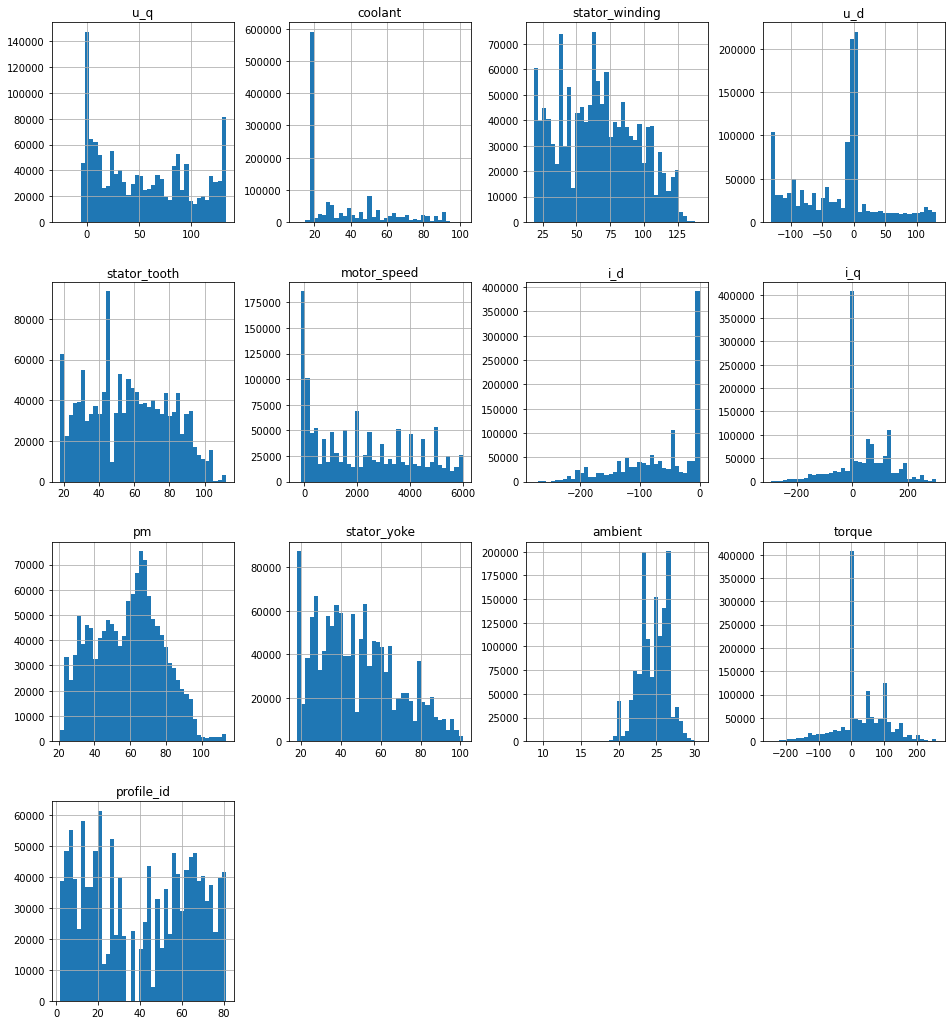

In [28]:
df.hist(figsize = (16,18), bins = 40)

In [29]:
df.corr()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
u_q,1.000000,0.051721,0.050610,0.004702,0.104373,0.683556,-0.100357,-0.124589,0.122365,0.090992,0.150264,-0.136215,-0.030499
coolant,0.051721,1.000000,0.504835,0.195517,0.674974,0.011872,0.074865,-0.256389,0.467117,0.860750,0.525963,-0.257982,0.635797
stator_winding,0.050610,0.504835,1.000000,-0.234950,0.970135,0.432034,-0.624370,0.065617,0.795893,0.860268,0.333208,0.095510,0.340580
u_d,0.004702,0.195517,-0.234950,1.000000,-0.142749,-0.288472,0.448331,-0.723069,-0.172031,-0.008098,0.203647,-0.753779,0.263264
stator_tooth,0.104373,0.674974,0.970135,-0.142749,1.000000,0.398431,-0.487062,-0.042294,0.832084,0.953115,0.443470,-0.018413,0.450821
motor_speed,0.683556,0.011872,0.432034,-0.288472,0.398431,1.000000,-0.700609,-0.068881,0.458947,0.255790,0.118232,-0.043903,-0.028585
i_d,-0.100357,0.074865,-0.624370,0.448331,-0.487062,-0.700609,1.000000,-0.231344,-0.427736,-0.278005,0.016397,-0.274097,0.053524
i_q,-0.124589,-0.256389,0.065617,-0.723069,-0.042294,-0.068881,-0.231344,1.000000,-0.142416,-0.131466,-0.314044,0.996457,-0.324654
pm,0.122365,0.467117,0.795893,-0.172031,0.832084,0.458947,-0.427736,-0.142416,1.000000,0.756684,0.513728,-0.117138,0.386241
stator_yoke,0.090992,0.860750,0.860268,-0.008098,0.953115,0.255790,-0.278005,-0.131466,0.756684,1.000000,0.520382,-0.117118,0.563437


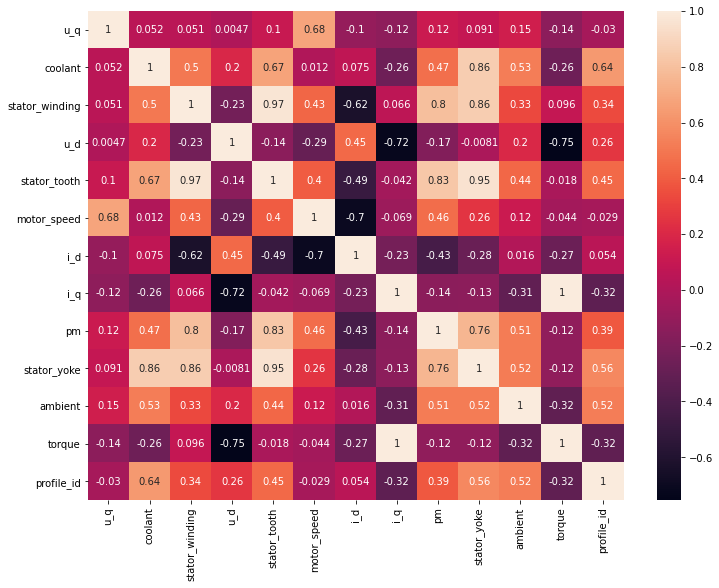

In [30]:
fig = plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

Text(0, 0.5, 'Yoke Temperature (C)')

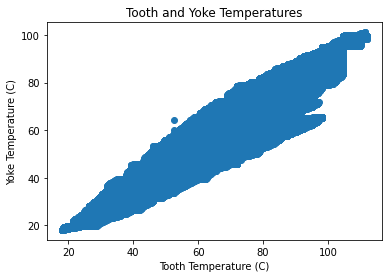

In [31]:
x = df.stator_tooth
y = df.stator_yoke
plt.scatter(x,y)
plt.title("Tooth and Yoke Temperatures")
plt.xlabel("Tooth Temperature (C)")
plt.ylabel("Yoke Temperature (C)")

<Figure size 1152x1152 with 0 Axes>

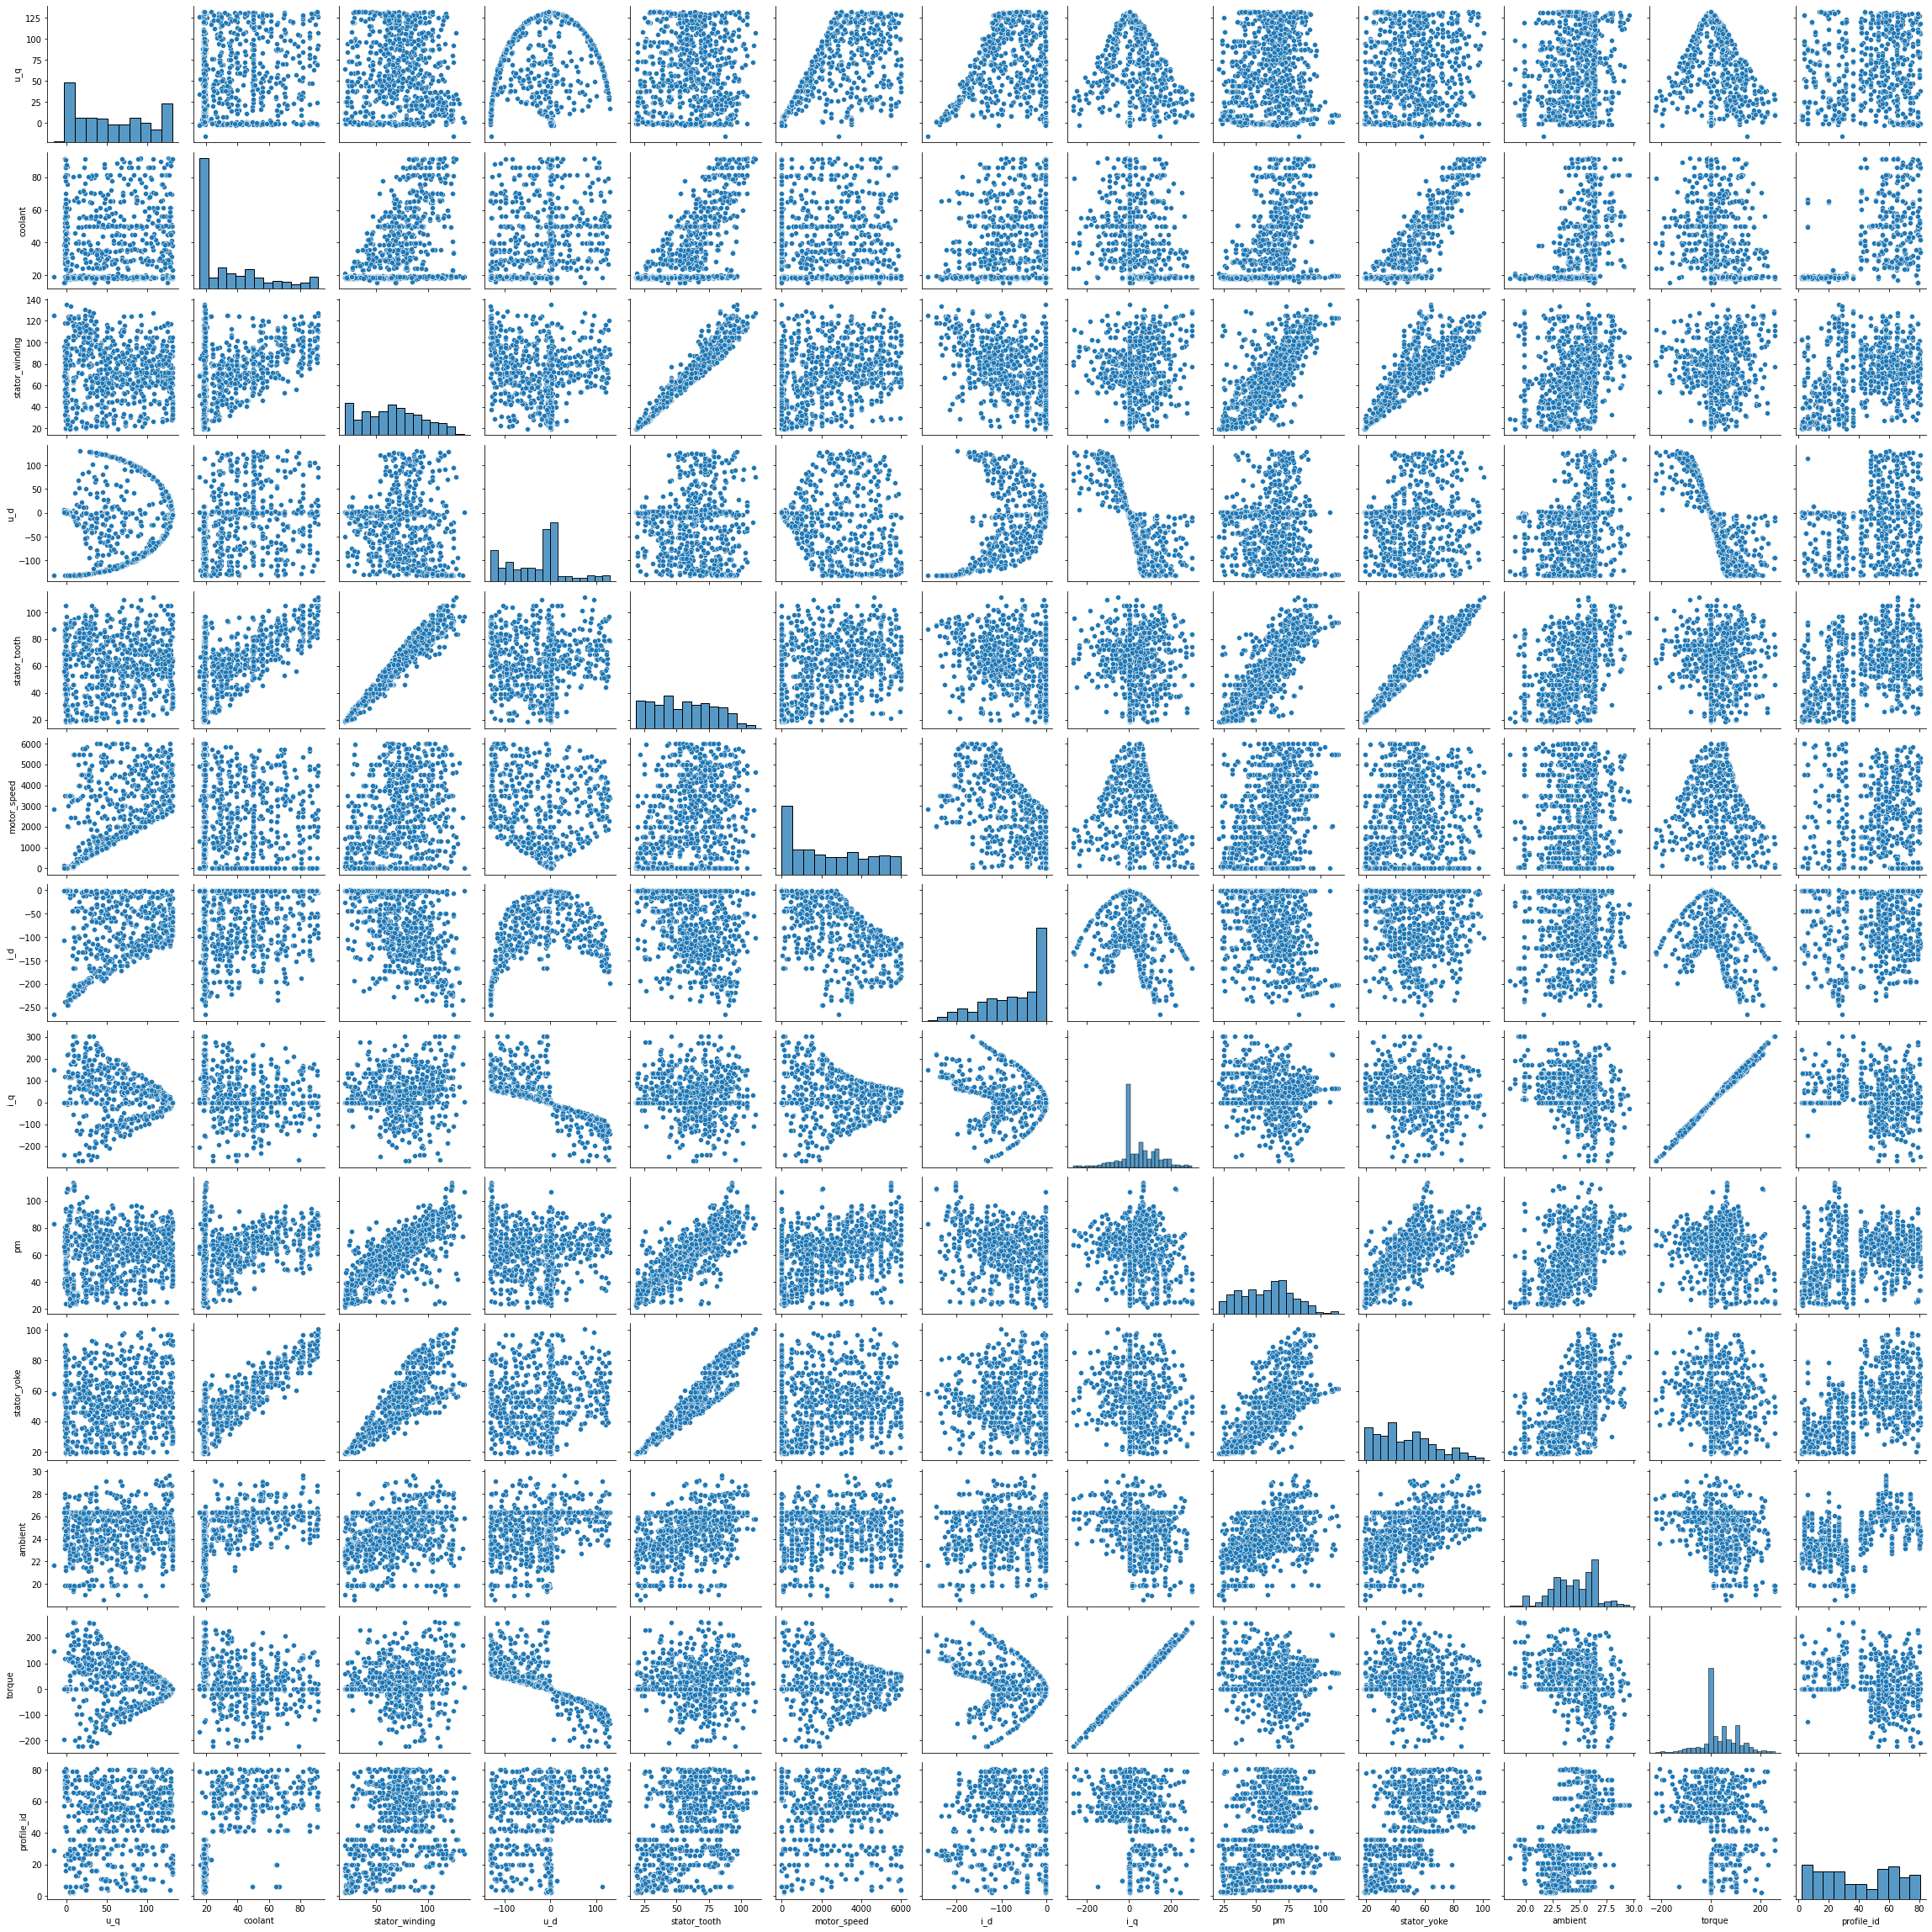

In [32]:
plt.figure(figsize=(16, 16))
sns.pairplot(df.sample(1000))
plt.show()

In [33]:
df['profile_id']

0          17
1          17
2          17
3          17
4          17
           ..
1330811    71
1330812    71
1330813    71
1330814    71
1330815    71
Name: profile_id, Length: 1330816, dtype: int64

<AxesSubplot:>

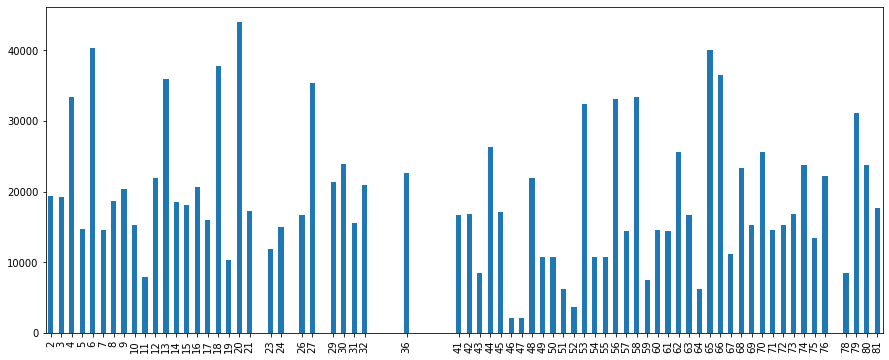

In [34]:
plt.figure(figsize=(15,6))
df['profile_id'].value_counts().plot(kind='bar')